# Airports Graph

#### Open Flights Dataset

https://openflights.org/data.html

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os
import operator
import warnings
warnings.filterwarnings('ignore')

## Dataset

Read the airlines data

In [2]:
names=["Id", "Name", "City", "Country","IATA","ICAO","Latitude","Longitude","Altitude","Timezone","DST","Type","Source",""]
airports = pd.read_csv('data/airports.csv', names=names)
airports.head(5)

,Id,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Type,Source,
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [3]:
airports.groupby('Country').size()

Country
Afghanistan       22
Albania            5
Algeria           44
American Samoa     2
Angola            25
                  ..
West Bank          1
Western Sahara     3
Yemen             11
Zambia            13
Zimbabwe          16
Length: 237, dtype: int64

In [4]:
airports.Country.unique().size

237

In [5]:
routes = pd.read_csv('data/routes.csv', 
                     names=["Airline","AirlineID",
                            "Source","SourceId","Destination","DestinationId",
                            "Codeshare","Stops","Equipment"])
routes.head(5)

,Airline,AirlineID,Source,SourceId,Destination,DestinationId,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [6]:
routes = routes[["Source","Destination","Airline"]]
routes.head(5)

,Source,Destination,Airline
0,AER,KZN,2B
1,ASF,KZN,2B
2,ASF,MRV,2B
3,CEK,KZN,2B
4,CEK,OVB,2B


In [7]:
#filter down to US airports

In [8]:
airports = airports[airports['Country'] =='United States']
airports.head()

,Id,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Type,Source,
3212,3411,Barter Island LRRS Airport,Barter Island,United States,BTI,PABA,70.134003,-143.582001,2,-9,A,America/Anchorage,airport,OurAirports
3213,3412,Wainwright Air Station,Fort Wainwright,United States,\N,PAWT,70.613403,-159.860001,35,-9,A,America/Anchorage,airport,OurAirports
3214,3413,Cape Lisburne LRRS Airport,Cape Lisburne,United States,LUR,PALU,68.875099,-166.110001,16,-9,A,America/Anchorage,airport,OurAirports
3215,3414,Point Lay LRRS Airport,Point Lay,United States,PIZ,PPIZ,69.732903,-163.005005,22,-9,A,America/Anchorage,airport,OurAirports
3216,3415,Hilo International Airport,Hilo,United States,ITO,PHTO,19.721399,-155.048004,38,-10,N,Pacific/Honolulu,airport,OurAirports


In [9]:
routes = routes[
    routes['Source'].isin(airports.IATA) &
    routes['Destination'].isin(airports.IATA)]
routes

,Source,Destination,Airline
172,ADQ,KLN,2O
177,KLN,KYK,2O
260,BRL,ORD,3E
261,BRL,STL,3E
262,DEC,ORD,3E
...,...,...,...
67565,SHR,DEN,ZK
67566,SOW,FMN,ZK
67567,SOW,PHX,ZK
67569,VIS,LAX,ZK


## Build Graph

In [10]:
edges = routes[['Source', 'Destination']].values
edges

array([['ADQ', 'KLN'],
       ['KLN', 'KYK'],
       ['BRL', 'ORD'],
       ...,
       ['SOW', 'PHX'],
       ['VIS', 'LAX'],
       ['WRL', 'CYS']], dtype=object)

In [11]:
#build graph from edges
g = nx.from_edgelist(edges, create_using=nx.DiGraph())

In [12]:
#number of nodes in the graph

In [13]:
#number of nodes and edges

In [14]:
#plot the graph

## Graph Mining

In [15]:
#nodes with the highest degrees

In [16]:
#does a route exist between every two airports? 
#is every airport reachable from every other airport?

### Connected components

In [17]:
#graph density

In [18]:
#Connected Components

In [19]:
#How many nodes are in the largest (in terms of nodes) weakly connected component?

In [20]:
#How many nodes are in the largest (in terms of nodes) strongly connected component?

### Path Finding

In [21]:
#Is there route between Chicago and San Franscisco

In [22]:
#is there route from Chicago and Friday Harbor Airport (FRD)

In [23]:
#what is the shortest route between Chicago and San Franscisco

In [24]:
#what is the shortest route between Chicago and Casper-Natrona County International Airport(CPR)

### Degree

In [25]:
#Top airports with the most incoming flights
#nodes with the highest in-degrees

In [26]:
#Top airports with the most outgoing flights
#nodes with the highest out-degrees

In [27]:
#plot degree histogram
degrees = dict(g.degree())
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(g)) for i in degree_values]

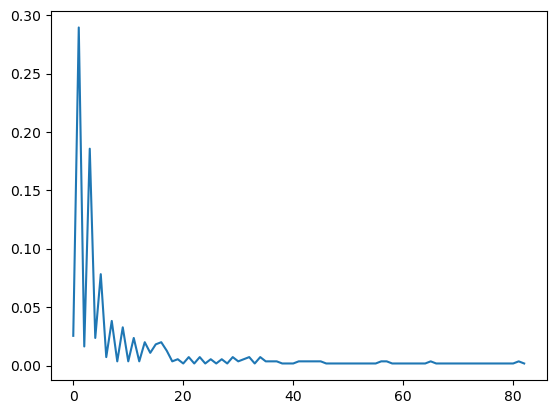

In [28]:
plt.plot(histogram)

## Centrality

### PageRank

In [29]:
#Top 5 airports by pagerank

In [30]:
#Top 5 airports by in_degree_centrality

In [31]:
#Top 5 airports by out_degree_centrality

### Closeness Centrality

In [32]:
#Which airports will allow you to reach all other airports with the lowest average number of airports in between?

In [33]:
#Which airports will make you reach all other airports with the highest average number of airports in between?

### Betweenness Centrality

In [34]:
# Which airports often act as bridges between other pairs of airports?

In [35]:
# Which airports least often act as bridges between other pairs of airports?

### Transitivity

In [36]:
# what is the transitivity and the average clustering coefficient of this graph